# Breath of the Wild

In [8]:
# call in dependencies
import requests
import json
import pandas as pd
import os
from pyrule_compendium import compendium
from pprint import pprint
import csv
import matplotlib.pyplot as plt
import csv

In [2]:
comp = compendium()

#pprint(comp.get_all()["equipment"][0]) # get all entries
# print(comp.get_entry("silver lynel")) # get a specific entry with it's name
# pprint(comp.get_entry(380)) #get a specific entry with it's ID
# pprint(comp.get_category("equipment")) # get all entries in a category
# comp.download_entry_image("silver lynel", "dream_pet.png") # download entry image

In [3]:
# create empty list to store item
equip_list = []
equip = {}
materials = []
monsters = []
foods = []
drops = []

In [4]:
# pull category data and assign to a variable, to be used for appending to lists.
equipment_json = comp.get_all()["equipment"]
materials_json = comp.get_all()["materials"]
monsters_json = comp.get_all()["monsters"]
creatures_json = comp.get_all()["creatures"]["food"]

# Monsters

In [43]:
# get foods and add to list
for i in monsters_json:
    
    # create a dictionary for monsters to create dataframe)
    monster_dict = {
        "name": i['name'],
        "id": i['id'],
    }
    
    # add dictionary to list
    monsters.append(monster_dict)

In [44]:
# create dataframe
monsters_df = monsters_df = pd.DataFrame(monsters).sort_values(by="name")

# sort alphabetically
monsters_df = monsters_df.drop_duplicates(subset=['id'], keep='first')

# set index
monsters_df = monsters_df.set_index("id")

# display dataframe
monsters_df

,name
id,
105,black bokoblin
149,black hinox
115,black lizalfos
110,black moblin
101,blizzrobe
...,...
161,waterblight ganon
123,white-maned lynel
162,windblight ganon


# Drops

In [45]:
# Iterate through json and check if the value that I represents is an empty list
# If it is set the drops variable to None otherwise append the drop information and create a DF
drops = []
for i in monsters_json:
    if i['drops'] == []:
        i['drops'] = None
    else:
        drops_dict = {
        "drops": i['drops'],
        "id": i['id'],
        }
    drops.append(drops_dict)
drops_df = pd.DataFrame(drops)

# transform each element into its own row in dataframe
drops_df = drops_df.explode('drops')

# display dataframe
drops_df

,drops,id
0,None,102
1,lynel horn,124
1,lynel hoof,124
1,lynel guts,124
1,topaz,124
...,...,...
79,ancient spring,129
79,ancient gear,129
79,ancient shaft,129
80,ancient screw,130


In [46]:
# clean data by dropping Nan
drops_df = drops_df.dropna()
drops_df

,drops,id
1,lynel horn,124
1,lynel hoof,124
1,lynel guts,124
1,topaz,124
1,ruby,124
...,...,...
79,ancient spring,129
79,ancient gear,129
79,ancient shaft,129
80,ancient screw,130


In [47]:
# groupby ID and count number of drops each monster has
drops_df = drops_df.groupby(['id'])['drops'].count()

# add it to dataframe
drops_df = pd.DataFrame(drops_df)

# display dataframe
drops_df

,drops
id,
84,1
85,1
86,1
87,1
88,2
89,2
90,2
91,2
92,3


In [48]:
# reset index for drops_df and monsters_df and merge the two dataframes
drops_df = drops_df.reset_index()
monsters_df = monsters_df.reset_index()

# merge drops_df and monsters_df dataframes
monsters_merged_df = pd.merge(monsters_df, drops_df, how="outer", on="id")
monsters_merged_df

,id,name,drops
0,105,black bokoblin,3.0
1,149,black hinox,9.0
2,115,black lizalfos,3.0
3,110,black moblin,3.0
4,101,blizzrobe,NaN
...,...,...,...
76,161,waterblight ganon,NaN
77,123,white-maned lynel,3.0
78,162,windblight ganon,NaN
79,135,yiga blademaster,6.0


In [49]:
# clean data by dropping Nan
monsters_merged_df = monsters_merged_df.dropna()
monsters_merged_df

,id,name,drops
0,105,black bokoblin,3.0
1,149,black hinox,9.0
2,115,black lizalfos,3.0
3,110,black moblin,3.0
5,104,blue bokoblin,3.0
6,148,blue hinox,12.0
7,114,blue lizalfos,3.0
8,109,blue moblin,3.0
9,122,blue-maned lynel,3.0
10,103,bokoblin,2.0


In [50]:
# rename columns
monsters_merged_df.columns = ["ID", "Monster Name", "Drop Count"]
monsters_merged_df

,ID,Monster Name,Drop Count
0,105,black bokoblin,3.0
1,149,black hinox,9.0
2,115,black lizalfos,3.0
3,110,black moblin,3.0
5,104,blue bokoblin,3.0
6,148,blue hinox,12.0
7,114,blue lizalfos,3.0
8,109,blue moblin,3.0
9,122,blue-maned lynel,3.0
10,103,bokoblin,2.0


In [51]:
# create new column for species in the monsters_merged_df dataframe
monsters_merged_df["Species"] = ""
monsters_merged_df

<ipython-input-51-b400f8667a13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsters_merged_df["Species"] = ""


,ID,Monster Name,Drop Count,Species
0,105,black bokoblin,3.0,
1,149,black hinox,9.0,
2,115,black lizalfos,3.0,
3,110,black moblin,3.0,
5,104,blue bokoblin,3.0,
6,148,blue hinox,12.0,
7,114,blue lizalfos,3.0,
8,109,blue moblin,3.0,
9,122,blue-maned lynel,3.0,
10,103,bokoblin,2.0,


In [52]:
# update dataframe by adding Species to each monster
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("koblin")] = "bokoblin"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("nox")] = "hinox"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("lizalfos")] = "lizalfos"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("moblin")] = "moblin"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("lynel")] = "lynel"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("chuchu")] = "chuchu"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("keese")] = "keese"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("robe")] = "wizzrobe"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("talus")] = "talus"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("octorok")] = "octorok"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("ganon")] = "ganon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("pebblit")] = "talus"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("master kohga")] = "yiga clan"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("yiga")] = "yiga clan"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("koshia")] = "sheikah"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("dinraal")] = "dragon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("naydra")] = "dragon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("farosh")] = "dragon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("guardian")] = "guardian scout"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("moldu")] = "moldugas"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("sentry")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("stalker")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("skywatcher")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("turret")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("decayed")] = "guardian"
monsters_merged_df

<ipython-input-52-3673f7a57955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("koblin")] = "bokoblin"
/Users/drewhenning/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-52-3673f7a57955>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m

,ID,Monster Name,Drop Count,Species
0,105,black bokoblin,3.0,bokoblin
1,149,black hinox,9.0,hinox
2,115,black lizalfos,3.0,lizalfos
3,110,black moblin,3.0,moblin
5,104,blue bokoblin,3.0,bokoblin
6,148,blue hinox,12.0,hinox
7,114,blue lizalfos,3.0,lizalfos
8,109,blue moblin,3.0,moblin
9,122,blue-maned lynel,3.0,lynel
10,103,bokoblin,2.0,bokoblin


In [53]:
# clean dataframe by reordering columns
monsters_merged_df = monsters_merged_df[["ID", "Species", "Monster Name", "Drop Count"]]
monsters_merged_df

,ID,Species,Monster Name,Drop Count
0,105,bokoblin,black bokoblin,3.0
1,149,hinox,black hinox,9.0
2,115,lizalfos,black lizalfos,3.0
3,110,moblin,black moblin,3.0
5,104,bokoblin,blue bokoblin,3.0
6,148,hinox,blue hinox,12.0
7,114,lizalfos,blue lizalfos,3.0
8,109,moblin,blue moblin,3.0
9,122,lynel,blue-maned lynel,3.0
10,103,bokoblin,bokoblin,2.0


In [54]:
# format dataframe by capitalizing the first letter in each word
monsters_merged_df["Species"]= monsters_merged_df["Species"].str.title()
monsters_merged_df["Monster Name"]= monsters_merged_df["Monster Name"].str.title()

In [55]:
# sort by species and ID
monsters_merged_df = monsters_merged_df.sort_values(by=["Species", "ID"], ascending=True)
monsters_merged_df

,ID,Species,Monster Name,Drop Count
10,103,Bokoblin,Bokoblin,2.0
5,104,Bokoblin,Blue Bokoblin,3.0
0,105,Bokoblin,Black Bokoblin,3.0
65,106,Bokoblin,Stalkoblin,2.0
59,107,Bokoblin,Silver Bokoblin,9.0
12,84,Chuchu,Chuchu,1.0
24,85,Chuchu,Fire Chuchu,1.0
40,86,Chuchu,Ice Chuchu,1.0
19,87,Chuchu,Electric Chuchu,1.0
37,125,Guardian,Guardian Stalker,6.0


In [56]:
# Save new DataFrame to csv file
monsters_merged_df.to_csv("BotW_Monsters.csv", index=False)

## Monster Observation

In [57]:
# analyze mode by monster to determine frequency
monster_quantity = monsters_merged_df.groupby(['Species'])["Monster Name"].count()
monsters_quantity_df = pd.DataFrame(monster_quantity).sort_values(by=["Monster Name"], ascending=False)
monsters_quantity_df = monsters_quantity_df.reset_index()

#rename columns
monsters_quantity_df.columns = ["Species", "Quantity"]

#display
monsters_quantity_df

,Species,Quantity
0,Lizalfos,8
1,Talus,8
2,Bokoblin,5
3,Guardian,5
4,Moblin,5
5,Octorok,5
6,Chuchu,4
7,Guardian Scout,4
8,Hinox,4
9,Keese,4


In [58]:
# analyze drop count by species
species_drop_sum = monsters_merged_df.groupby(['Species'])['Drop Count'].sum()
species_df = pd.DataFrame(species_drop_sum).sort_values(by=["Drop Count"], ascending=False)
species_df.reset_index()

# display
species_df

,Drop Count
Species,
Talus,34.0
Hinox,32.0
Lizalfos,28.0
Guardian,27.0
Octorok,20.0
Bokoblin,19.0
Moblin,19.0
Lynel,17.0
Guardian Scout,16.0


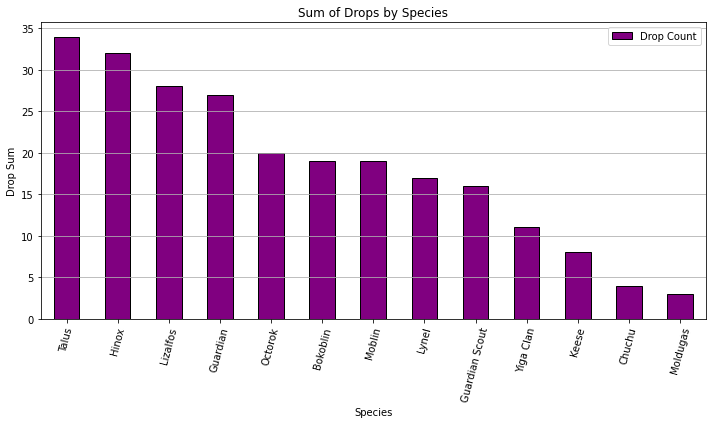

In [59]:
# plot bar chart of species and sum of drops
fig, ax = plt.subplots()
species_df.plot(kind="bar", figsize=(10,6), ax=ax, color="purple", edgecolor="black",
                  title="Sum of Drops by Species",
                  xlabel="Species",
                  ylabel="Drop Sum");
plt.xticks(rotation = 75)
ax.yaxis.grid()
fig.tight_layout();

# save figure
plt.savefig("../BotW/images/Number of Drops by Species.png")

Monster Species Analysis
* The chart above shows us the sum of drops by each species of monster
* Rounding out the top 3 is the Talus with 34, Hinox with 32 and Lizalfos with 28
* These species of monsters in general will produce more drops, therefore, fighting any of the monsters within that species will yield a higher reward
* As the sum for each species increase, you will need to defeat less of these monsters if you are looking to add to your inventory
* As the sum for each species decrease, you will need to defeat more of these monsters if you are looking to add to your inventory

In [60]:
# analyze drop count by name
monster_drop_count = monsters_merged_df.groupby(['Monster Name'])["Drop Count"].sum()
monster_drop_count_df = pd.DataFrame(monster_drop_count).sort_values(by=["Drop Count"], ascending=False)
monster_drop_count_df.reset_index()

# display
monster_drop_count_df.head(10)

,Drop Count
Monster Name,
Blue Hinox,12.0
Hinox,10.0
Silver Lizalfos,9.0
Silver Bokoblin,9.0
Silver Moblin,9.0
Black Hinox,9.0
Treasure Octorok,8.0
Silver Lynel,8.0
Stone Talus (Rare),7.0


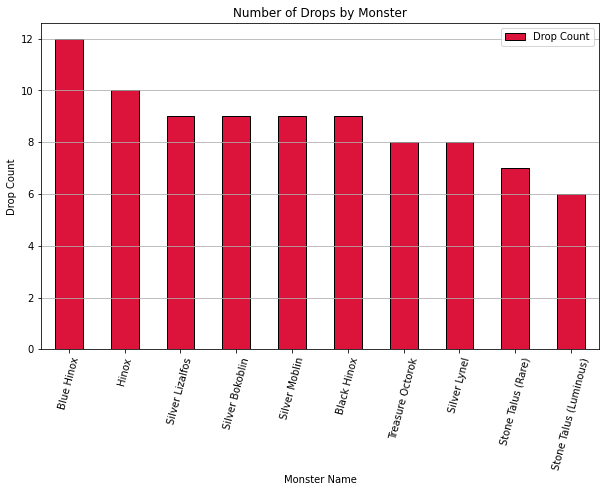

In [61]:
# plot bar chart of top 10 monster by drop total
fig1, ax1 = plt.subplots()
monster_drop_count_df.head(10).plot(kind="bar", figsize=(10,6), ax=ax1, color="crimson", edgecolor="black",
                  title="Number of Drops by Monster",
                  xlabel="Monster Name",
                  ylabel="Drop Count");
plt.xticks(rotation=75)
ax1.yaxis.grid()
fig.tight_layout();

# save figure
plt.savefig("../BotW/images/Number of Drops by Monster.png")

In [62]:
average = monster_drop_count_df['Drop Count'].mean()
std = monster_drop_count_df['Drop Count'].std()
print(average)
print(std)
average - std

3.966666666666667
2.5575853725444095


1.4090812941222572

Monster Drop Analysis
* The chart above shows us the number of drops by each individual monster
* Rounding out the top 5 is the Blue Hinox with 12, Hinox with 10, and the Silver Lizalfos, Silver Bokoblin and Silver Moblin with 9 each
* These monsters will produce more drops after defeat which provides more value to your inventory when collecting items
* It is likely that the higher the drops, the more difficult the enemy is. More information is needed to prove this analysis
* Additionally, we can use basic statistics to form a stronger analysis. 
    * The average number of drops each monster produces is 3.966. How accurate is this? We use the standard deviation to measure how far away this average deviates from the true value.
    * The standard deviation of monster drops is 2.557. What does 2.557 tell us? 
    * A strong standard deviation is within ±2 of the average. Take the difference of our two values and we get 1.409, which is less than 2.
    * We can confidently say that a monster with drop counts greater than 4 (above average) will yield a higher reward/add more value to your inventory.